In [1]:
%%capture install_xgboost
!pip install xgboost

In [15]:
from data_preparation import Preparation
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, RandomizedSearchCV, train_test_split
import xgboost as xgb
import warnings
from sklearn.metrics import mean_squared_error
import graphviz
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint

In [3]:
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("COVIDiSTRESS_April_27_clean.csv", encoding= 'unicode_escape')
prep = Preparation()
df = prep.clean(df)
df = prep.selection_alteration(df)
df = prep.scaling(df)

In [5]:
y = df["PSS10_avg"].to_numpy().reshape(-1, 1)

In [6]:
x = df.drop("PSS10_avg", axis="columns")

In [7]:
feature_names = [col for col in x.columns]

In [8]:
x = x.to_numpy()

In [9]:
x, x_test, y, y_test = train_test_split(x, y, test_size=0.02)

In [10]:
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

In [17]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), 
    "max_depth": randint(2, 6), 
    "n_estimators": randint(100, 150),
    "subsample": uniform(0.6, 0.4)
}
search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=200, scoring='neg_mean_squared_error', cv=kfold, verbose=3, return_train_score=True)

search.fit(x, y)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV 1/3] END colsample_bytree=0.7793068480549644, gamma=0.22011327865328184, learning_rate=0.09561742920722484, max_depth=5, n_estimators=111, subsample=0.7570988390096349;, score=(train=-0.010, test=-0.010) total time=   2.8s
[CV 2/3] END colsample_bytree=0.7793068480549644, gamma=0.22011327865328184, learning_rate=0.09561742920722484, max_depth=5, n_estimators=111, subsample=0.7570988390096349;, score=(train=-0.010, test=-0.010) total time=   2.9s
[CV 3/3] END colsample_bytree=0.7793068480549644, gamma=0.22011327865328184, learning_rate=0.09561742920722484, max_depth=5, n_estimators=111, subsample=0.7570988390096349;, score=(train=-0.010, test=-0.010) total time=   2.8s
[CV 1/3] END colsample_bytree=0.8656366557779137, gamma=0.04759323545383182, learning_rate=0.19398286092004846, max_depth=3, n_estimators=112, subsample=0.7741709056312728;, score=(train=-0.010, test=-0.010) total time=   1.6s
[CV 2/3] END colsample_bytree

[CV 1/3] END colsample_bytree=0.8257680453997759, gamma=0.30313495568958476, learning_rate=0.20938549408556528, max_depth=5, n_estimators=105, subsample=0.951841579196264;, score=(train=-0.010, test=-0.011) total time=   2.5s
[CV 2/3] END colsample_bytree=0.8257680453997759, gamma=0.30313495568958476, learning_rate=0.20938549408556528, max_depth=5, n_estimators=105, subsample=0.951841579196264;, score=(train=-0.010, test=-0.011) total time=   2.5s
[CV 3/3] END colsample_bytree=0.8257680453997759, gamma=0.30313495568958476, learning_rate=0.20938549408556528, max_depth=5, n_estimators=105, subsample=0.951841579196264;, score=(train=-0.010, test=-0.010) total time=   2.5s
[CV 1/3] END colsample_bytree=0.7922293825190088, gamma=0.39994175113437685, learning_rate=0.15637431186450007, max_depth=3, n_estimators=140, subsample=0.934960968501497;, score=(train=-0.010, test=-0.011) total time=   2.0s
[CV 2/3] END colsample_bytree=0.7922293825190088, gamma=0.39994175113437685, learning_rate=0.156

[CV 2/3] END colsample_bytree=0.8360831762955373, gamma=0.16401065599543313, learning_rate=0.2521072676413875, max_depth=3, n_estimators=109, subsample=0.7235532610834532;, score=(train=-0.010, test=-0.010) total time=   1.9s
[CV 3/3] END colsample_bytree=0.8360831762955373, gamma=0.16401065599543313, learning_rate=0.2521072676413875, max_depth=3, n_estimators=109, subsample=0.7235532610834532;, score=(train=-0.010, test=-0.010) total time=   1.9s
[CV 1/3] END colsample_bytree=0.9961679263377378, gamma=0.3750771121993657, learning_rate=0.07649067184527819, max_depth=2, n_estimators=110, subsample=0.9040918073608049;, score=(train=-0.011, test=-0.011) total time=   1.3s
[CV 2/3] END colsample_bytree=0.9961679263377378, gamma=0.3750771121993657, learning_rate=0.07649067184527819, max_depth=2, n_estimators=110, subsample=0.9040918073608049;, score=(train=-0.011, test=-0.011) total time=   1.3s
[CV 3/3] END colsample_bytree=0.9961679263377378, gamma=0.3750771121993657, learning_rate=0.0764

[CV 3/3] END colsample_bytree=0.769932781177924, gamma=0.4414193468300841, learning_rate=0.22594687101410657, max_depth=3, n_estimators=146, subsample=0.8883690449414156;, score=(train=-0.011, test=-0.011) total time=   2.1s
[CV 1/3] END colsample_bytree=0.9813474812099912, gamma=0.013247795763323134, learning_rate=0.26166295569837694, max_depth=3, n_estimators=125, subsample=0.8665369682354238;, score=(train=-0.010, test=-0.010) total time=   1.9s
[CV 2/3] END colsample_bytree=0.9813474812099912, gamma=0.013247795763323134, learning_rate=0.26166295569837694, max_depth=3, n_estimators=125, subsample=0.8665369682354238;, score=(train=-0.010, test=-0.010) total time=   1.8s
[CV 3/3] END colsample_bytree=0.9813474812099912, gamma=0.013247795763323134, learning_rate=0.26166295569837694, max_depth=3, n_estimators=125, subsample=0.8665369682354238;, score=(train=-0.010, test=-0.010) total time=   1.8s
[CV 1/3] END colsample_bytree=0.8574483649589013, gamma=0.3583253522568161, learning_rate=0

[CV 1/3] END colsample_bytree=0.8986558163936095, gamma=0.38913429595535587, learning_rate=0.09845497498124699, max_depth=3, n_estimators=121, subsample=0.9424838079189086;, score=(train=-0.010, test=-0.011) total time=   1.7s
[CV 2/3] END colsample_bytree=0.8986558163936095, gamma=0.38913429595535587, learning_rate=0.09845497498124699, max_depth=3, n_estimators=121, subsample=0.9424838079189086;, score=(train=-0.010, test=-0.011) total time=   1.7s
[CV 3/3] END colsample_bytree=0.8986558163936095, gamma=0.38913429595535587, learning_rate=0.09845497498124699, max_depth=3, n_estimators=121, subsample=0.9424838079189086;, score=(train=-0.010, test=-0.011) total time=   1.8s
[CV 1/3] END colsample_bytree=0.8758536754654277, gamma=0.2933152820713105, learning_rate=0.30495812963491553, max_depth=2, n_estimators=108, subsample=0.909580646775557;, score=(train=-0.010, test=-0.011) total time=   1.2s
[CV 2/3] END colsample_bytree=0.8758536754654277, gamma=0.2933152820713105, learning_rate=0.30

[CV 2/3] END colsample_bytree=0.7787276627300483, gamma=0.3944390811717585, learning_rate=0.04603077093390388, max_depth=3, n_estimators=105, subsample=0.7653526581707667;, score=(train=-0.011, test=-0.011) total time=   1.6s
[CV 3/3] END colsample_bytree=0.7787276627300483, gamma=0.3944390811717585, learning_rate=0.04603077093390388, max_depth=3, n_estimators=105, subsample=0.7653526581707667;, score=(train=-0.011, test=-0.011) total time=   1.5s
[CV 1/3] END colsample_bytree=0.7079214838462828, gamma=0.24728561035629398, learning_rate=0.134449349166979, max_depth=5, n_estimators=106, subsample=0.7194360243717888;, score=(train=-0.010, test=-0.011) total time=   2.9s
[CV 2/3] END colsample_bytree=0.7079214838462828, gamma=0.24728561035629398, learning_rate=0.134449349166979, max_depth=5, n_estimators=106, subsample=0.7194360243717888;, score=(train=-0.010, test=-0.010) total time=   2.8s
[CV 3/3] END colsample_bytree=0.7079214838462828, gamma=0.24728561035629398, learning_rate=0.13444

[CV 3/3] END colsample_bytree=0.8772944368396399, gamma=0.08479861478937772, learning_rate=0.07857350893362616, max_depth=3, n_estimators=141, subsample=0.8977721871398896;, score=(train=-0.010, test=-0.010) total time=   2.1s
[CV 1/3] END colsample_bytree=0.8820660907319607, gamma=0.19626904115805838, learning_rate=0.12724826356997998, max_depth=3, n_estimators=117, subsample=0.9758849285051868;, score=(train=-0.010, test=-0.011) total time=   1.8s
[CV 2/3] END colsample_bytree=0.8820660907319607, gamma=0.19626904115805838, learning_rate=0.12724826356997998, max_depth=3, n_estimators=117, subsample=0.9758849285051868;, score=(train=-0.010, test=-0.010) total time=   1.7s
[CV 3/3] END colsample_bytree=0.8820660907319607, gamma=0.19626904115805838, learning_rate=0.12724826356997998, max_depth=3, n_estimators=117, subsample=0.9758849285051868;, score=(train=-0.010, test=-0.010) total time=   1.8s
[CV 1/3] END colsample_bytree=0.970919331463836, gamma=0.1382645727814804, learning_rate=0.0

[CV 1/3] END colsample_bytree=0.7252707223611943, gamma=0.19309342267203167, learning_rate=0.20778051608532697, max_depth=5, n_estimators=118, subsample=0.957636966072323;, score=(train=-0.010, test=-0.010) total time=   3.0s
[CV 2/3] END colsample_bytree=0.7252707223611943, gamma=0.19309342267203167, learning_rate=0.20778051608532697, max_depth=5, n_estimators=118, subsample=0.957636966072323;, score=(train=-0.010, test=-0.010) total time=   3.0s
[CV 3/3] END colsample_bytree=0.7252707223611943, gamma=0.19309342267203167, learning_rate=0.20778051608532697, max_depth=5, n_estimators=118, subsample=0.957636966072323;, score=(train=-0.010, test=-0.010) total time=   3.1s
[CV 1/3] END colsample_bytree=0.9157700279469745, gamma=0.034292737388201155, learning_rate=0.10354026143970024, max_depth=2, n_estimators=126, subsample=0.7001991803803617;, score=(train=-0.010, test=-0.011) total time=   1.4s
[CV 2/3] END colsample_bytree=0.9157700279469745, gamma=0.034292737388201155, learning_rate=0.

[CV 2/3] END colsample_bytree=0.7095412768746812, gamma=0.1597974932112763, learning_rate=0.28873949941406174, max_depth=4, n_estimators=135, subsample=0.8302496042207993;, score=(train=-0.010, test=-0.010) total time=   2.8s
[CV 3/3] END colsample_bytree=0.7095412768746812, gamma=0.1597974932112763, learning_rate=0.28873949941406174, max_depth=4, n_estimators=135, subsample=0.8302496042207993;, score=(train=-0.010, test=-0.010) total time=   2.6s
[CV 1/3] END colsample_bytree=0.7231104984435777, gamma=0.25858678826068776, learning_rate=0.19688509964343237, max_depth=2, n_estimators=133, subsample=0.7399816447137959;, score=(train=-0.010, test=-0.011) total time=   1.6s
[CV 2/3] END colsample_bytree=0.7231104984435777, gamma=0.25858678826068776, learning_rate=0.19688509964343237, max_depth=2, n_estimators=133, subsample=0.7399816447137959;, score=(train=-0.010, test=-0.011) total time=   1.6s
[CV 3/3] END colsample_bytree=0.7231104984435777, gamma=0.25858678826068776, learning_rate=0.1

[CV 3/3] END colsample_bytree=0.7205772904053032, gamma=0.494132249527893, learning_rate=0.25839511898627865, max_depth=5, n_estimators=113, subsample=0.9625420091647966;, score=(train=-0.010, test=-0.011) total time=   3.0s
[CV 1/3] END colsample_bytree=0.7161577446138768, gamma=0.4885772650212491, learning_rate=0.32162091321383823, max_depth=2, n_estimators=137, subsample=0.9886727477551895;, score=(train=-0.011, test=-0.011) total time=   1.6s
[CV 2/3] END colsample_bytree=0.7161577446138768, gamma=0.4885772650212491, learning_rate=0.32162091321383823, max_depth=2, n_estimators=137, subsample=0.9886727477551895;, score=(train=-0.011, test=-0.011) total time=   1.6s
[CV 3/3] END colsample_bytree=0.7161577446138768, gamma=0.4885772650212491, learning_rate=0.32162091321383823, max_depth=2, n_estimators=137, subsample=0.9886727477551895;, score=(train=-0.011, test=-0.011) total time=   1.6s
[CV 1/3] END colsample_bytree=0.9471059597290685, gamma=0.11980073067153496, learning_rate=0.2625

[CV 1/3] END colsample_bytree=0.7282526908843343, gamma=0.12063180693722614, learning_rate=0.07680572987432678, max_depth=5, n_estimators=144, subsample=0.9709494172020992;, score=(train=-0.010, test=-0.010) total time=   3.9s
[CV 2/3] END colsample_bytree=0.7282526908843343, gamma=0.12063180693722614, learning_rate=0.07680572987432678, max_depth=5, n_estimators=144, subsample=0.9709494172020992;, score=(train=-0.010, test=-0.010) total time=   3.8s
[CV 3/3] END colsample_bytree=0.7282526908843343, gamma=0.12063180693722614, learning_rate=0.07680572987432678, max_depth=5, n_estimators=144, subsample=0.9709494172020992;, score=(train=-0.010, test=-0.010) total time=   3.7s
[CV 1/3] END colsample_bytree=0.7502270731885633, gamma=0.3984065608332586, learning_rate=0.13638322434988814, max_depth=2, n_estimators=130, subsample=0.7371765051621458;, score=(train=-0.011, test=-0.011) total time=   1.5s
[CV 2/3] END colsample_bytree=0.7502270731885633, gamma=0.3984065608332586, learning_rate=0.1

[CV 2/3] END colsample_bytree=0.9605575690395463, gamma=0.483157700675566, learning_rate=0.04343062660646373, max_depth=3, n_estimators=106, subsample=0.6321293707809973;, score=(train=-0.011, test=-0.011) total time=   2.0s
[CV 3/3] END colsample_bytree=0.9605575690395463, gamma=0.483157700675566, learning_rate=0.04343062660646373, max_depth=3, n_estimators=106, subsample=0.6321293707809973;, score=(train=-0.011, test=-0.011) total time=   1.7s
[CV 1/3] END colsample_bytree=0.9938170898413529, gamma=0.3297082892460493, learning_rate=0.06708050947135814, max_depth=3, n_estimators=108, subsample=0.613131580058868;, score=(train=-0.011, test=-0.011) total time=   1.7s
[CV 2/3] END colsample_bytree=0.9938170898413529, gamma=0.3297082892460493, learning_rate=0.06708050947135814, max_depth=3, n_estimators=108, subsample=0.613131580058868;, score=(train=-0.011, test=-0.011) total time=   1.8s
[CV 3/3] END colsample_bytree=0.9938170898413529, gamma=0.3297082892460493, learning_rate=0.06708050

[CV 3/3] END colsample_bytree=0.7924782151713372, gamma=0.44069121218455387, learning_rate=0.06259093191548393, max_depth=5, n_estimators=130, subsample=0.7189528307692377;, score=(train=-0.010, test=-0.011) total time=   4.3s
[CV 1/3] END colsample_bytree=0.8907207621640625, gamma=0.1268365056275293, learning_rate=0.20583584700804972, max_depth=2, n_estimators=118, subsample=0.8293298781326697;, score=(train=-0.010, test=-0.011) total time=   1.3s
[CV 2/3] END colsample_bytree=0.8907207621640625, gamma=0.1268365056275293, learning_rate=0.20583584700804972, max_depth=2, n_estimators=118, subsample=0.8293298781326697;, score=(train=-0.010, test=-0.010) total time=   1.3s
[CV 3/3] END colsample_bytree=0.8907207621640625, gamma=0.1268365056275293, learning_rate=0.20583584700804972, max_depth=2, n_estimators=118, subsample=0.8293298781326697;, score=(train=-0.010, test=-0.010) total time=   1.4s
[CV 1/3] END colsample_bytree=0.918028322401629, gamma=0.2898655434890373, learning_rate=0.1919

[CV 1/3] END colsample_bytree=0.9029796927062925, gamma=0.061114717725964385, learning_rate=0.12035777521036937, max_depth=2, n_estimators=124, subsample=0.7865056379987543;, score=(train=-0.010, test=-0.011) total time=   1.4s
[CV 2/3] END colsample_bytree=0.9029796927062925, gamma=0.061114717725964385, learning_rate=0.12035777521036937, max_depth=2, n_estimators=124, subsample=0.7865056379987543;, score=(train=-0.010, test=-0.011) total time=   1.6s
[CV 3/3] END colsample_bytree=0.9029796927062925, gamma=0.061114717725964385, learning_rate=0.12035777521036937, max_depth=2, n_estimators=124, subsample=0.7865056379987543;, score=(train=-0.010, test=-0.011) total time=   1.5s
[CV 1/3] END colsample_bytree=0.9752462696251334, gamma=0.032387452705642916, learning_rate=0.2673715714356901, max_depth=5, n_estimators=103, subsample=0.7803835314142126;, score=(train=-0.009, test=-0.011) total time=   2.8s
[CV 2/3] END colsample_bytree=0.9752462696251334, gamma=0.032387452705642916, learning_ra

[CV 2/3] END colsample_bytree=0.7461784446900159, gamma=0.24865410742341848, learning_rate=0.05055647912317478, max_depth=3, n_estimators=142, subsample=0.6786902512381408;, score=(train=-0.011, test=-0.011) total time=   2.0s
[CV 3/3] END colsample_bytree=0.7461784446900159, gamma=0.24865410742341848, learning_rate=0.05055647912317478, max_depth=3, n_estimators=142, subsample=0.6786902512381408;, score=(train=-0.011, test=-0.011) total time=   2.2s
[CV 1/3] END colsample_bytree=0.9171637667540109, gamma=0.23989561143657806, learning_rate=0.08671083429207105, max_depth=3, n_estimators=141, subsample=0.8853915651520199;, score=(train=-0.010, test=-0.011) total time=   2.2s
[CV 2/3] END colsample_bytree=0.9171637667540109, gamma=0.23989561143657806, learning_rate=0.08671083429207105, max_depth=3, n_estimators=141, subsample=0.8853915651520199;, score=(train=-0.010, test=-0.010) total time=   2.1s
[CV 3/3] END colsample_bytree=0.9171637667540109, gamma=0.23989561143657806, learning_rate=0

[CV 3/3] END colsample_bytree=0.9021608517374436, gamma=0.04909346945134618, learning_rate=0.226399570294094, max_depth=4, n_estimators=125, subsample=0.9095943811853875;, score=(train=-0.009, test=-0.010) total time=   2.3s
[CV 1/3] END colsample_bytree=0.865962436542975, gamma=0.3141774603589929, learning_rate=0.31391974394800526, max_depth=4, n_estimators=142, subsample=0.658636083095698;, score=(train=-0.010, test=-0.011) total time=   3.0s
[CV 2/3] END colsample_bytree=0.865962436542975, gamma=0.3141774603589929, learning_rate=0.31391974394800526, max_depth=4, n_estimators=142, subsample=0.658636083095698;, score=(train=-0.010, test=-0.011) total time=   3.2s
[CV 3/3] END colsample_bytree=0.865962436542975, gamma=0.3141774603589929, learning_rate=0.31391974394800526, max_depth=4, n_estimators=142, subsample=0.658636083095698;, score=(train=-0.010, test=-0.011) total time=   3.1s
[CV 1/3] END colsample_bytree=0.9753230959573984, gamma=0.41277860398541044, learning_rate=0.0682824038

[CV 1/3] END colsample_bytree=0.9128356938776744, gamma=0.2358281469278113, learning_rate=0.21243077587845974, max_depth=2, n_estimators=105, subsample=0.8005100042784972;, score=(train=-0.010, test=-0.011) total time=   1.2s
[CV 2/3] END colsample_bytree=0.9128356938776744, gamma=0.2358281469278113, learning_rate=0.21243077587845974, max_depth=2, n_estimators=105, subsample=0.8005100042784972;, score=(train=-0.010, test=-0.011) total time=   1.2s
[CV 3/3] END colsample_bytree=0.9128356938776744, gamma=0.2358281469278113, learning_rate=0.21243077587845974, max_depth=2, n_estimators=105, subsample=0.8005100042784972;, score=(train=-0.010, test=-0.011) total time=   1.2s
[CV 1/3] END colsample_bytree=0.885723808381483, gamma=0.3975423061575203, learning_rate=0.1700835803491037, max_depth=3, n_estimators=100, subsample=0.855582595096855;, score=(train=-0.010, test=-0.011) total time=   1.5s
[CV 2/3] END colsample_bytree=0.885723808381483, gamma=0.3975423061575203, learning_rate=0.17008358

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=Non...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff4c2060b50>,
                                        'max_depth': <scipy.st

In [18]:
df_model = pd.DataFrame(search.cv_results_)
df_model.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.823300,0.053233,0.017874,0.000608,0.779307,0.220113,0.095617,5,111,0.757099,...,-0.010371,-0.010369,-0.010405,0.000050,31,-0.009981,-0.009992,-0.010037,-0.010003,0.000024
1,1.653797,0.047944,0.013945,0.000493,0.865637,0.047593,0.193983,3,112,0.774171,...,-0.010344,-0.010306,-0.010359,0.000051,20,-0.009961,-0.009967,-0.009978,-0.009969,0.000007
2,1.811743,0.019331,0.013313,0.000416,0.748638,0.378409,0.160608,3,117,0.900134,...,-0.010536,-0.010549,-0.010572,0.000042,103,-0.010367,-0.010410,-0.010438,-0.010405,0.000029
3,2.180728,0.004084,0.016340,0.000795,0.894447,0.234584,0.126865,4,109,0.664902,...,-0.010430,-0.010368,-0.010439,0.000062,39,-0.010136,-0.010167,-0.010162,-0.010155,0.000014
4,2.256075,0.058979,0.014675,0.001456,0.724294,0.283912,0.165159,4,109,0.894945,...,-0.010446,-0.010439,-0.010482,0.000056,57,-0.010173,-0.010200,-0.010207,-0.010194,0.000014


In [19]:
df_model.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
179,3.669348,0.093882,0.019055,0.001062,0.728238,0.002094,0.119765,5,135,0.863264,...,-0.010225,-0.010199,-0.010244,0.000046,1,-0.009019,-0.009036,-0.009091,-0.009049,0.000031
121,2.673006,0.070963,0.017893,0.001090,0.752391,0.050066,0.152357,4,139,0.960212,...,-0.010238,-0.010242,-0.010264,0.000034,2,-0.009470,-0.009488,-0.009543,-0.009501,0.000031
45,3.242724,0.114536,0.019607,0.001092,0.882868,0.077899,0.167787,5,135,0.905053,...,-0.010269,-0.010227,-0.010270,0.000035,3,-0.008968,-0.008993,-0.009016,-0.008992,0.000019
11,3.050241,0.042896,0.019013,0.000147,0.925,0.061889,0.175841,5,129,0.879242,...,-0.010299,-0.010243,-0.010292,0.000038,4,-0.008806,-0.008827,-0.008829,-0.008821,0.000011
123,3.781289,0.082699,0.021133,0.002185,0.728253,0.120632,0.076806,5,144,0.970949,...,-0.010274,-0.010239,-0.010293,0.000054,5,-0.009631,-0.009644,-0.009682,-0.009652,0.000022


In [20]:
y_pred = search.predict(x_test)

mse=mean_squared_error(y_test, y_pred, squared=False)
mse

0.1016825571865817

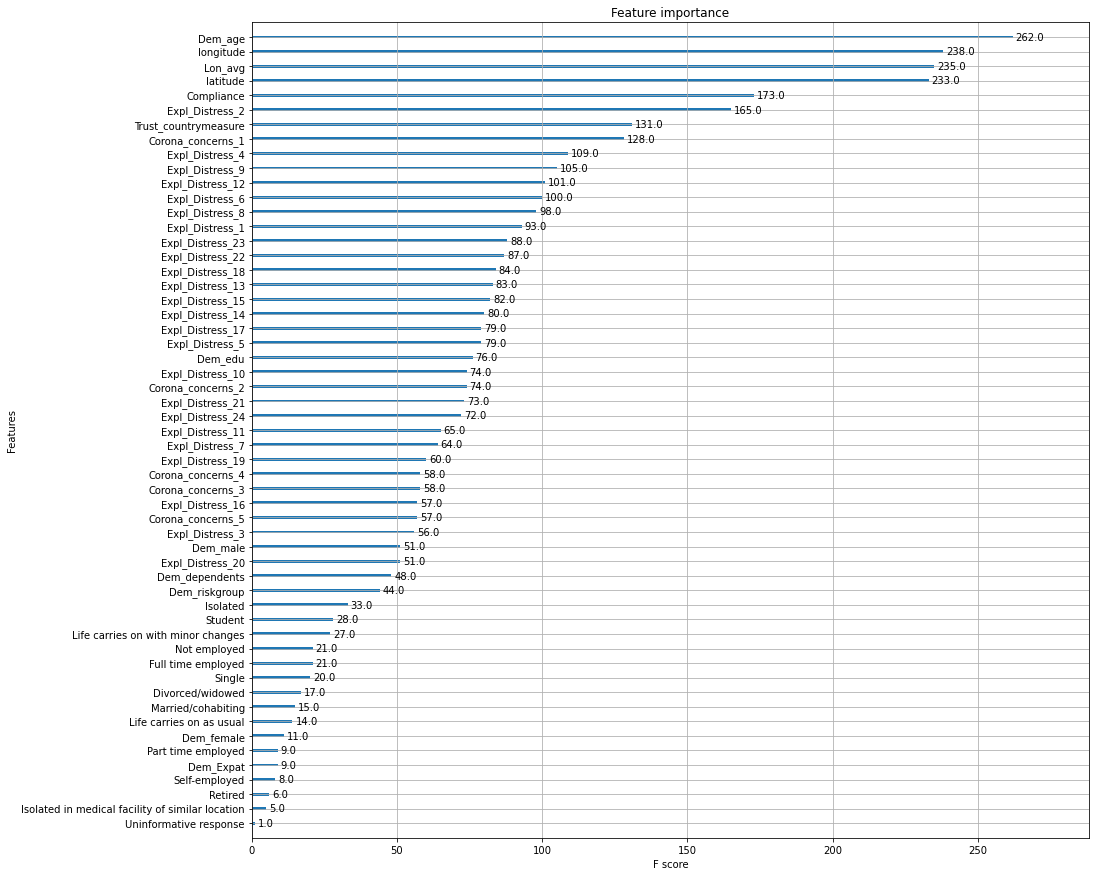

In [23]:
search.best_estimator_.get_booster().feature_names = feature_names
fig, ax = plt.subplots(figsize=(15,15))
xgb.plot_importance(search.best_estimator_.get_booster(), ax=ax)
plt.show()